<center><h4><b>PHY4905/5905: Computational Physics – Spring 2022</b></h4></center>
<center><h4><b>Homework #3: The Power of a Quasar</b></h4></center>
<center><h4><b>Code Author: Pratiksha Balasaheb Gaikwad</b></h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


**1. Write code that can read in the data in "quasar_spectrum.txt" and assign the
data to appropriate variables. Make a plot of the quasar spectrum.**

In [2]:
# Read data from input file
# freq_data == Column 1 --> Unit = log_10 Hz
# lum_data == column 2 --> Unit = log_10 W
freq_data, lum_data = np.loadtxt("quasar_spectrum.txt", usecols = (0,1), unpack ="True")


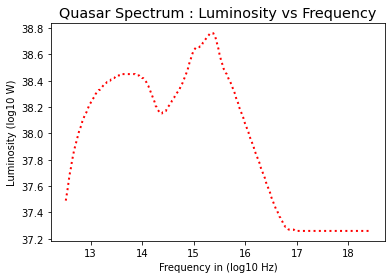

In [3]:
# Plot of the Quasar Spectrum

plt.plot(freq_data,lum_data, color ='red', linestyle=':',
         linewidth = 2)
plt.style.use('bmh')
plt.xlabel('Frequency in (log10 Hz)')
plt.ylabel('Luminosity (log10 W)')
plt.title('Quasar Spectrum : Luminosity vs Frequency')
plt.show()

<hr style="height:2px;border-width:0;color:blue;background-color:blue">

**2. Write code to calculate the luminosity in a specified portion of the quasar spectrum,
by performing numerical integration. Your code should be able to use any of the
following integration methods:**  
    (a) Piecewise constant integration (the “rectangle rule")  
    (b) Piecewise linear integration (the “trapezoidal rule")  
    (c) Simpson’s Rule

In [4]:
class integrate:
    '''Class 'integrate' constitutes integration methods,
        1. Rectangle Rule
        2. Trapezoidal Rule
        3. Simpson's Rule, 
        
        along with common variables, defined in '__init__' function, which are used as parameters by constituting methods. 
    
    Each method calculates following variables:
    h :  step size
    s OR s_tot : sum over integration functions
    result : value of integration using THE method
    rel_err : relative error    
    
    '''
    def __init__(self,freq_data, lum_data, func, N, xmin, xmax, exact, verbose=True):
        self.freq_data = freq_data # array of input frequency data
        self.lum_data = lum_data # array of input luminosity data
        self.func = func # function to integrate over
        self.N = N # No. of bins
        self.xmin = xmin # minimum limit of integration
        self.xmax = xmax # maximum limit of integration
        self.exact = exact # exact value of integration function
        self.verbose = verbose # keyword to print data
        
        
    def rectangle(self):
        h = (self.xmax-self.xmin)/self.N # step-size
        s = 0.0
        result = 0.0
        rel_err = 0.0
    
        for k in range(self.N):
            s += self.func(np.interp(self.xmin + k*h, self.freq_data,self.lum_data))
            
        result = h*s
        rel_err = abs((self.exact-result)/self.exact)
        if self.verbose:
            print(f"\nIntegral with rectangle rule: {result:.6g}")
            print(f"Rel. error {rel_err:.6g} with {self.N} bins.")
        
        return result, rel_err
    
    
    def trapezoidal(self):
        h = (self.xmax-self.xmin)/self.N #step-size
        
        # a : value of integration function at xmin
        # b : value of integration function at xmax
        a = self.func(np.interp(self.xmin, self.freq_data, self.lum_data))
        b = self.func(np.interp(self.xmax, self.freq_data, self.lum_data))
        s = 0.5*(a+b)
        
        for k in np.arange(1,self.N,1):
            s += self.func(np.interp(self.xmin + k*h, self.freq_data, self.lum_data))
        
        result = h*s
        rel_err = abs((self.exact-result)/self.exact)
    
        if self.verbose:
            print(f"\nIntegral with trapezoid rule: {result:.6g}")
            print(f"Rel. error {rel_err:.6g} with {self.N} bins.")
        
        return result, rel_err 
    
    def simpson(self):
        h = (self.xmax-self.xmin)/self.N
        
        a = self.func(np.interp(self.xmin, self.freq_data, self.lum_data))
        b = self.func(np.interp(self.xmax, self.freq_data, self.lum_data))
        s = a+b
        tmp_sum = 0.0
    
        for k in np.arange(1,self.N,1):
            tmp = self.func(np.interp(self.xmin + k*h, self.freq_data, self.lum_data))
        
            if k%2 == 0:            
                tmp *= 2
            else:
                tmp *= 4
            tmp_sum += tmp
   
        s_tot = s + tmp_sum
        result = s_tot*h/3.0
        
        rel_err = abs((self.exact-result)/self.exact)
    
        if self.verbose:
            print(f"\nIntegral with Simpson's rule: {result:.6g}")
            print(f"Rel. error {rel_err:.6g} with {self.N} bins.")
        
        return result, rel_err
    


In [5]:
def lum_func(val):
    '''
    This is a function for integration. It takes,
        val : luminosity value from the data (unit: log10 W)
    as an input and returns 
        f_val : 10 to the power of input value then multiplied with natural log.    
    '''
    f_val = 10**(val)*math.log(10)
    return f_val

<hr style="height:2px;border-width:0;color:blue;background-color:blue">

**3. For each of these integration methods, have your code perform the integration over
the entire spectrum to calculate the total luminosity, and print the results. You should
also calculate the relative error for each method, given that the true total luminosity
of the quasar is $L_{tot,exact} = 2.195102 ×1039$ W.**

In [6]:
# min_freq & max_freq : minimum & maximum value of given frequency data in column 1 of input data file

min_freq, max_freq = min(freq_data), max(freq_data)
L_exact = 2.195102e+39 # Unit =  W 

In [7]:
N_rect = 1 # No. of bins
erel_rect = 10000 # Random maximum initial relative error

#'while' loop to obtain specified accuracy.
# It takes the condition relative error < minimum accuracy required.
while erel_rect > 0.01:
    N_rect += 1
    p = integrate(freq_data, lum_data, lum_func, N_rect, min_freq, max_freq, L_exact, verbose=False) # Objected created using THE 'class'
    result_rect, erel_rect = p.rectangle() # accessing class method through object

print(f"\nIntegral with rectangle rule: {result_rect:.6g}")
print(f"Rel. error {erel_rect:.6g} with {N_rect} bins.")
        


Integral with rectangle rule: 2.18484e+39
Rel. error 0.00467378 with 6 bins.


In [8]:
N_trap = 1
erel_trap = 10000
while erel_trap > 0.01:
    N_trap += 1
    q = integrate(freq_data, lum_data, lum_func, N_trap, min_freq, max_freq, L_exact, verbose=False)
    result_trap, erel_trap = q.trapezoidal()
    
print(f"\nIntegral with trapezoidal rule: {result_trap:.6g}")
print(f"Rel. error {erel_trap:.6g} with {N_trap} bins.")


Integral with trapezoidal rule: 2.20936e+39
Rel. error 0.00649429 with 8 bins.


In [9]:
N_simp = 1
erel_simp = 10000
while erel_simp > 0.01:
    N_simp += 1
    r = integrate(freq_data, lum_data, lum_func, N_simp, min_freq, max_freq, L_exact, verbose=False)
    result_simp, erel_simp = r.simpson()

print(f"\nIntegral with Simpson's rule: {result_simp:.6g}")
print(f"Rel. error {erel_simp:.6g} with {N_simp} bins.")


Integral with Simpson's rule: 2.2012e+39
Rel. error 0.00277768 with 10 bins.


In [10]:
# Printing all result at a place
print("\n Method \t\t No. of bins \t\t Integration Value \t\t Relative Error\n")
print(f"Rectangle Rule \t\t\t {N_rect} \t\t {result_rect:.6g} \t\t\t {erel_rect}")
print(f"Trapezoidal Rule \t\t {N_trap} \t\t {result_trap:.6g} \t\t\t {erel_trap}")
print(f"Simpson's Rule \t\t\t {N_simp} \t\t {result_simp:.6g} \t\t\t {erel_simp}")




 Method 		 No. of bins 		 Integration Value 		 Relative Error

Rectangle Rule 			 6 		 2.18484e+39 			 0.004673779918522545
Trapezoidal Rule 		 8 		 2.20936e+39 			 0.006494291603826903
Simpson's Rule 			 10 		 2.2012e+39 			 0.0027776811021028055


<hr style="height:2px;border-width:0;color:blue;background-color:blue">

**4. Compare the total luminosity of the quasar to the luminosity of the Sun. How many
stars with the Sun’s luminosity would a galaxy need for its total stellar luminosity to
equal the quasar’s luminosity? How does this compare to the approximate number
of stars in the Milky Way galaxy?**

<span style="color:orange">**Answer:** </span> <span style="color:blue"> The solar luminosity is $3.828e+26 W.$ The total solar luminosity along with the solar neutrino luminosity is $3.916e+26 W.$</span>


In [11]:
L_sun = 3.916e+26 # Total solar luminosity  #Unit = W
L_quasar = L_exact # Given: Quasar's luminosity = 2.195102e+39 W

print(f"It needs {L_quasar/L_sun:e} stars with the Sun's luminosity to equal the quasar's luminosity.")


It needs 5.605470e+12 stars with the Sun's luminosity to equal the quasar's luminosity.


<span style="color:blue"> Astronomers estimate there are about 100 billion stars in our Milky Way galaxy.  
As per the above calculation:, </span>

In [12]:
stars_milkyway = 100e9 # No. of stars in Milky Way galaxy
print(f"It needs almost {round(L_quasar/L_sun/stars_milkyway)} times more stars than those are present in the Milky Way galaxy.")

It needs almost 56 times more stars than those are present in the Milky Way galaxy.


<hr style="height:2px;border-width:0;color:blue;background-color:blue">

**5. Finally, choose one of these integration methods and calculate the luminosity in only
the visible portion of the spectrum (wavelength range λ = 400 −700 nm). What fraction of the quasar’s total luminosity is emitted in the visible portion of the spectrum?**

In [13]:
# minimum & maximum values of given wavelength range
min_lambda = 400e-9 # Unit = m, converted nm to m
max_lambda = 700e-9

c = 3e8 # Speed of light, unit = m/sec
# Frequency & wavelength relationship: \nu = c /lambda


# minimum & maximum limit of integration 
# in the form log10(frequency)
# Unit : log10 (Hz)
min_lim = math.log10(c/min_lambda) 
max_lim = math.log10(c/max_lambda)
print(min_lim)
print(max_lim)

14.8750612633917
14.632023214705406


In [14]:
N_vis_simp = 1
erel_vis_simp = 10000
while erel_vis_simp > 0.005:
    N_vis_simp += 1
    vis = integrate(freq_data, lum_data, lum_func, 296, min_freq, max_freq, L_exact, verbose=False)
    result_vis_simp, erel_vis_simp = vis.simpson()

print(f"\nIntegral with Simpson's rule: {result_vis_simp:.6g}")
print(f"Rel. error {erel_vis_simp:.6g} with {N_vis_simp} bins.")


Integral with Simpson's rule: 2.19461e+39
Rel. error 0.000223487 with 2 bins.


In [15]:
# Just trying with #bins = #given data points
s = integrate(freq_data, lum_data, lum_func, 296, min_freq, max_freq, L_exact, verbose=True)
result_vis, erel_vis = s.simpson()


Integral with Simpson's rule: 2.19461e+39
Rel. error 0.000223487 with 296 bins.


In [16]:
L_quasar = L_exact # Given: Quasar's luminosity = 2.195102e+39 W
print("Given value of quasar's total luminosity =", L_quasar, "W.")

print(f"\nFraction of {result_vis/L_quasar} quasar's total luminosity is emitted in the visible portion of spectrum.")


Given value of quasar's total luminosity = 2.195102e+39 W.

Fraction of 0.9997765128120366 quasar's total luminosity is emitted in the visible portion of spectrum.


<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">

<center><h2><b>Bonus: Another Approach</b></h2></center>

In [17]:
# Read data from input file
# freq_data == Column 1 --> Unit = log_10 Hz
# lum_data == column 2 --> Unit = log_10 W
freq_data, lum_data = np.loadtxt("quasar_spectrum.txt", usecols = (0,1), unpack ="True")


In [18]:
# Printing given data for observation
print("Given frequency data = \n", freq_data)
print("\n\nTotal number of data points =", np.size(freq_data), "\n")

Given frequency data = 
 [12.52 12.54 12.56 12.58 12.6  12.62 12.64 12.66 12.68 12.7  12.72 12.74
 12.76 12.78 12.8  12.82 12.84 12.86 12.88 12.9  12.92 12.94 12.96 12.98
 13.   13.02 13.04 13.06 13.08 13.1  13.12 13.14 13.16 13.18 13.2  13.22
 13.24 13.26 13.28 13.3  13.32 13.34 13.36 13.38 13.4  13.42 13.44 13.46
 13.48 13.5  13.52 13.54 13.56 13.58 13.6  13.62 13.64 13.66 13.68 13.7
 13.72 13.74 13.76 13.78 13.8  13.82 13.84 13.86 13.88 13.9  13.92 13.94
 13.96 13.98 14.   14.02 14.04 14.06 14.08 14.1  14.12 14.14 14.16 14.18
 14.2  14.22 14.24 14.26 14.28 14.3  14.32 14.34 14.36 14.38 14.4  14.42
 14.44 14.46 14.48 14.5  14.52 14.54 14.56 14.58 14.6  14.62 14.64 14.66
 14.68 14.7  14.72 14.74 14.76 14.78 14.8  14.82 14.84 14.86 14.88 14.9
 14.92 14.94 14.96 14.98 15.   15.02 15.04 15.06 15.08 15.1  15.12 15.14
 15.16 15.18 15.2  15.22 15.24 15.26 15.28 15.3  15.32 15.34 15.36 15.38
 15.4  15.42 15.44 15.46 15.48 15.5  15.52 15.54 15.56 15.58 15.6  15.62
 15.64 15.66 15.68 15.7  15.

**Observation:** Given data points of frequency ($log_{10} \nu$)

    1. Are at the interval of 0.02. This value can be used as a step size.
    2. Are 296 in numbers. Therefore, no. of bins for integration can be set to 296.

In [56]:
# Loading all given data in one single array
data = np.loadtxt("quasar_spectrum.txt", usecols = (0,1), unpack ="True") 

#print(data)
print("(#dimensions, #data points) in the data array = ", data.shape) 


# Printing sample data point
print(f"(frequency, luminosity) = ({data[0][0]}, {data[1][0]})")

(#dimensions, #data points) in the data array =  (2, 296)
(frequency, luminosity) = (12.52, 37.49)


In [20]:
step_size = 0.02 # step_size based on given data
nbins = 296 # no. of bins = no. of given data points

In [21]:
# print data type 
print(type(freq_data))

<class 'numpy.ndarray'>


In [78]:
class integrate:
    '''Class 'integrate' constitutes integration methods,
        1. Rectangle Rule
        2. Trapezoidal Rule
        3. Simpson's Rule, 
        
        along with common variables, defined in '__init__' function, which are used as parameters by constituting methods. 
    
    Each method calculates following variables:
    h :  step size
    s OR s_tot : sum over integration functions
    result : value of integration using THE method
    rel_err : relative error    
    
    '''
    def __init__(self,data, func, h,  exact, verbose=True):
        self.data = data # array of input data of frequency & luminosity
        self.func = func # function to integrate over
        self.h = h # step size
        self.exact = exact # exact value of integration function
        self.verbose = verbose # keyword to print data
        #N = self.data.shape[1] # No.of data points
        
        
    def rectangle(self):
        s = 0.0
        result = 0.0
        rel_err = 0.0
    
        for freq in self.data[0]: #loop over frequency values
            #print(freq)
            #print(np.where(self.data[0] == freq))
            #print(self.data[1][np.where(self.data[0] == freq)])
            s += self.func(self.data[1][np.where(self.data[0] == freq)]) #passing corresponding luminosity values to 'func'
            
        result = self.h*s
        rel_err = abs((self.exact-result)/self.exact)
        
        if self.verbose:
            print(f"\nIntegral with rectangle rule: {result[0]:.6g}")
            print(f"Rel. error {rel_err[0]:.6g} with {self.data.shape[1]} bins.")
        
        return result, rel_err
    
    
    def trapezoidal(self):
        # a : value of integration function at xmin
        # b : value of integration function at xmax
        a = self.func(min(self.data[0]))
        b = self.func(max(self.data[0]))
        
        s = 0.5*(a+b)
        
        for k in np.arange(1,self.data.shape[1]-1,1):
            s += self.func(self.data[1][k])
        result = self.h*s
        rel_err = abs((self.exact-result)/self.exact)
        
        if self.verbose:
            print(f"\nIntegral with trapezoid rule: {result:.6g}")
            print(f"Rel. error {rel_err:.6g} with {self.data.shape[1]} bins.")
        
    
        return result, rel_err 
    
    def simpson(self):
        # a : value of integration function at xmin
        # b : value of integration function at xmax
        a = self.func(min(self.data[0]))
        b = self.func(max(self.data[0]))
          
        s = a+b
        tmp_sum = 0.0
    
        for k in np.arange(1,self.data.shape[1]-1,1):
            tmp = self.func(self.data[1][k])
            
            if k%2 == 0:            
                tmp *= 2
            else:
                tmp *= 4
            tmp_sum += tmp
   
        s_tot = s + tmp_sum
        result = s_tot*self.h/3.0
        
        rel_err = abs((self.exact-result)/self.exact)
    
        if self.verbose:
            print(f"\nIntegral with Simpson's rule: {result:.6g}")
            print(f"Rel. error {rel_err:.6g} with {self.data.shape[1]} bins.")
        
        return result, rel_err
    


In [79]:
def lum_func(val):
    '''
    This is a function for integration. It takes,
        val : luminosity value from the data (unit: log10 W)
    as an input and returns 
        f_val : 10 to the power of input value then multiplied with natural log.    
    '''
    f_val = 10**(val)*math.log(10)
    return f_val

In [80]:
print("Quasar's exact total luminosity = ", L_exact, "\n\n")
t = integrate(data, lum_func, step_size, L_exact, verbose=True) # Objected created using THE 'class'
result_rect, erel_rect = t.rectangle() # accessing class method through object


Quasar's exact total luminosity =  2.195102e+39 



Integral with rectangle rule: 2.19622e+39
Rel. error 0.000511327 with 296 bins.


In [81]:
trapz = integrate(data, lum_func, step_size, L_exact, verbose=True) # Objected created using THE 'class'
result_trapz, erel_trapz = trapz.trapezoidal() # accessing class method through object



Integral with trapezoid rule: 2.19396e+39
Rel. error 0.000518756 with 296 bins.


In [82]:
simps = integrate(data, lum_func, step_size, L_exact, verbose=True) # Objected created using THE 'class'
result_simps, erel_simps = simps.simpson() # accessing class method through object



Integral with Simpson's rule: 2.19354e+39
Rel. error 0.000711066 with 296 bins.


In [83]:
# Printing all result at a place
print ("**********For Integration over all data points**********")
print("\n Method \t\t  Integration Value \t\t Relative Error\n")
print(f"Rectangle Rule  \t\t {result_rect[0]:.6g} \t\t\t {erel_rect[0]}")
print(f"Trapezoidal Rule  \t\t {result_trapz:.6g} \t\t\t {erel_trapz}")
print(f"Simpson's Rule \t\t\t {result_simps:.6g} \t\t\t {erel_simps}")



**********For Integration over all data points**********

 Method 		  Integration Value 		 Relative Error

Rectangle Rule  		 2.19622e+39 			 0.0005113266317836322
Trapezoidal Rule  		 2.19396e+39 			 0.0005187561859257225
Simpson's Rule 			 2.19354e+39 			 0.0007110662985214786
